# Setup

In [56]:
!pip -q install openai
!pip -q install langchain
!pip -q install langchain_openai # >= 0.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.


In [1]:
!python -c "import openai; print('openai:', openai.__version__)"
!python -c "import langchain; print('langchain:', langchain.__version__)"

openai: 1.6.1
langchain: 0.1.0


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#API KEY 저장을 위한 os 라이브러리 호출
import os
from google.colab import userdata

#OPENAI API키 저장
#API KEY 발급 페이지: https://platform.openai.com/docs/guides/gpt/completions-api
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Chains in LangChain

- 언어모델의 사용을 효율적으로 만들어 주는 라이브러리에 왜 `chain`이란 단어가 등장하는가?

- 언어 모델을 사용하는 것은 prompt와 completion의 연속

- 하나의 목적을 달성하기 위해 분할된 prompt와 completion을 사용

- 이렇게 여러 단계로 나눠서 처음 입력에 대한 응답을 받아올 때 분할된 개별 prompt-completion을 사슬 고리 하나로 보고 이것들이 연결된 것을 사슬chain이라고 일컬음

- 살펴볼 체인의 종류
    - LLMChain
    - SimpleSequentialChain
    - SequentialChain



## LLMChain

- 프롬프트와 언어 모델을 연결하는 제일 단순한 사슬고리

- LLMChain(prompt->llm->response)

In [6]:
# from langchain.chat_models import ChatOpenAI # for < 0.1.0
from langchain_openai import ChatOpenAI # for >= 0.1.0
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [7]:
llm = ChatOpenAI(temperature=0.9, model="gpt-3.5-turbo-1106")

In [8]:
tpl = "{product}를 생산하는 회사의 가장 좋은 이름은 무엇입니까?"

prompt_tpl = ChatPromptTemplate.from_template(tpl)

In [9]:
# Chain 1: llm과 프롬프트를 연결하는 체인 제일 단순한 체인
chain = LLMChain(llm=llm, prompt=prompt_tpl)

In [10]:
product = "합리적 가격의 컴퓨터 부품"

# 내부적으로 프롬프트를 완성하고 llm에 입력하고
# 출력을 받아오는 과정이 수행됨
# 그래서 chain이라고 하는가봄
chain.invoke(product)

{'product': '합리적 가격의 컴퓨터 부품', 'text': '합리텍스 컴퓨터 파츠 제작소'}

## Sequential Chains

- 사실 고리 하나 하나를 순차적으로 연결하여 만드는 체인



### SimpleSequentialChain

- 첫번째 사슬 고리의 출력이 두번째 사슬고리의 입력으로 들어가는 방식

- 입력이 하나고 출력도 그에 따른 하나일 때 잘 동작

-  LLMChain(prompt->llm->response) ->  LLMChain(prompt->llm->response) -> ...

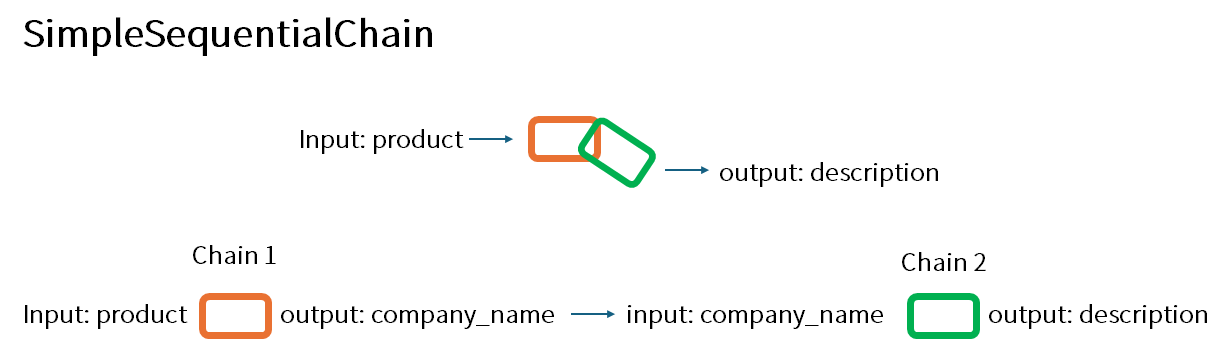

In [11]:
from langchain.chains import SimpleSequentialChain

In [12]:
tpl_1 = "{product}를 생산하는 회사의 가장 좋은 이름은 무엇입니까?"

prompt_tpl_1 = ChatPromptTemplate.from_template(tpl_1)

# Chain 1: llm과 프롬프트를 연결하는 체인 제일 단순한 체인
chain_1 = LLMChain(llm=llm, prompt=prompt_tpl_1)

In [13]:
# prompt template 2
tpl_2 = "다음 회사에 대해 20자 짧은 설명을 작성하세요:{company_name}"

prompt_tpl_2 = ChatPromptTemplate.from_template(tpl_2)

# chain 2: 두번째 회사 이름을 입력받고 회사에 대한 설명을 출력하는 체인
chain_2 = LLMChain(llm=llm, prompt=prompt_tpl_2)

In [14]:
# 이 둘을 그냥 연결함
# 이제 진짜 체인이 등장했음
overall_simple_chain = SimpleSequentialChain(
    chains=[chain_1, chain_2],
    verbose=True
)

In [15]:
# 체인의 첫 입력인 product만 넣으면
# product->company name->description으로 체인이 진행됨
overall_simple_chain.invoke(product)

# simpleSeqChain은 단일 입력, 단일 출력일때 잘 동작한다고 함.



> Entering new SimpleSequentialChain chain...


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


"리즌테크"


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


: 글로벌 기업용 인프라 솔루션을 제공하는 기술 기업.

> Finished chain.


{'input': '합리적 가격의 컴퓨터 부품', 'output': ': 글로벌 기업용 인프라 솔루션을 제공하는 기술 기업.'}

### SequentialChain

- 입력과 출력이 여러 개인 경우 일반적으로 사용하는 시퀀셜 체인

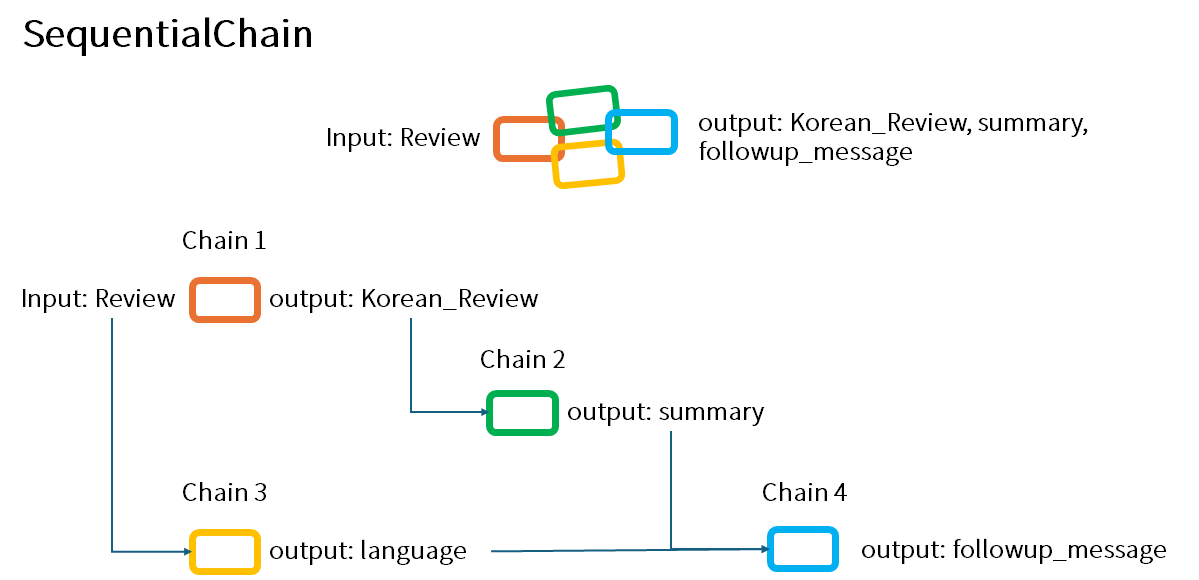

In [16]:
sample_review = """
 I needed something a little larger than the typical 15.6" monitor and
 I had to go with UPerfect, as they have put out some really nice monitors already.
 I was definitely not disappointed.
 This IPS monitor has very thin bezels and a slim profile overall.
 Along the right side are the input controls, on screen controls and a toggle wheel that can quickly control volume or brightness, as well as control other display settings for the monitor.
 On the left side are the physical inputs: 2 USB-C and a mini HDMI.
 On the back, there is a very nicely designed swivel stand that rotates 180 degrees.
 Initially in the closed position, the swivel blocks and protects the side controls and inputs.
 Once in use, it swivels out to pitch the monitor and any angel you wish.
 There is ample rubber on the bottoms and I found the monitor was firmly planted wherever I had it.

The picture quality is very nice.
The IPS display has amazing color reproduction with a bright/crisp display.
I'm really impressed by the awesome viewing angles.
If you can see it, you can make out the picture!
The package also had a generous amount of cables included, pretty much all you'll need for this.
There's also a nice pouch for you to store your monitor safely.

I'm really happy with this purchase overall.
The only things that can be improved include the lack of a remote, but its not hard to use the onboard controls...definitely easier than the UI's from other monitor manufacturers.
I also wished there was a headphone jack.
Still, I'd highly recommend this for anyone looking to use this for gaming.
The 1080P 60hz monitor is usually enough to enjoy most mainstream games available today.
I'd also recommend it for professionals on the go, who needs that extra screen real estate to be more productive.
Obviously, students and anyone looking for a quality portable monitor would benefit from this as well.
The monitor has met all of my expectations thus far.
"""

In [17]:
from langchain.chains import SequentialChain

In [18]:
# prompt template 1: translate to english
prompt_tpl_1 = ChatPromptTemplate.from_template(
    "다음 리뷰를 한국어로 번역하세요:\n\n{Review}"
)
# chain 1: input variable= Review, output variable= Korean_Review
chain_1 = LLMChain(llm=llm, prompt=prompt_tpl_1,
                     output_key="Korean_Review" # 여기 체인간 넘겨줄 변수의 이름을 지정함
                    )


In [19]:
prompt_tpl_2 = ChatPromptTemplate.from_template(
    "다음 리뷰를 한 문장으로 요약하세요:\n\n{Korean_Review}"
)
# chain 2: input varialble=Korean_Review, output variable=summary
chain_2 = LLMChain(llm=llm, prompt=prompt_tpl_2,
                     output_key="summary"
                    )


In [20]:
# 여기서 Review 변수는 첫번째 체인의 Review
prompt_tpl_3 = ChatPromptTemplate.from_template(
    "다음 리뷰의 언어는 무엇인가요:\n\n{Review}"
)
# chain 3: input variable= Review, output variable= language
chain_3 = LLMChain(llm=llm, prompt=prompt_tpl_3,
                    output_key="language"
                    )


In [21]:
prompt_tpl_4 = ChatPromptTemplate.from_template(
    "리뷰에 대한 요약문에 따라올 판매자의 응답을 다음에 지정된 언어로 작성하세요:\n\n요약문: {summary}\n\n지정된 언어: {language}"
)
# chain 4: input variable=summary, language, output variable=followup_message
chain_4 = LLMChain(llm=llm, prompt=prompt_tpl_4,
                      output_key="followup_message"
                     )


In [22]:
# overall_chain: input variable= Review
# and output variable= Korean_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_1, chain_2, chain_3, chain_4],
    input_variables=["Review"],
    output_variables=["Korean_Review", "summary", "followup_message"],
    verbose=True
)

In [23]:
overall_chain.invoke(sample_review)



> Entering new SequentialChain chain...


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(



> Finished chain.


{'Review': '\n I needed something a little larger than the typical 15.6" monitor and \n I had to go with UPerfect, as they have put out some really nice monitors already. \n I was definitely not disappointed. \n This IPS monitor has very thin bezels and a slim profile overall. \n Along the right side are the input controls, on screen controls and a toggle wheel that can quickly control volume or brightness, as well as control other display settings for the monitor. \n On the left side are the physical inputs: 2 USB-C and a mini HDMI. \n On the back, there is a very nicely designed swivel stand that rotates 180 degrees. \n Initially in the closed position, the swivel blocks and protects the side controls and inputs. \n Once in use, it swivels out to pitch the monitor and any angel you wish. \n There is ample rubber on the bottoms and I found the monitor was firmly planted wherever I had it.\n\nThe picture quality is very nice. \nThe IPS display has amazing color reproduction with a brig